# Project (Statistical Learning)

## Context
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

### Steps:

1.Read the problem statement

2.Get the dataset

3.Explore the dataset

4.Question & Answer

## Step1 - Problem Statement



We want to see if we can dive deep into this data to find some valuable insights.

## Step2 - Get the Dataset 

In [1]:
#Importing pandas library for Data Frame
import pandas as pd

#Importing numpy
import numpy as np

#Importing ploting libraries
import matplotlib.pyplot as plt   

#Importing seaborn for statistical plots
import seaborn as sns

#Misc
import math

import warnings
warnings.filterwarnings('ignore')

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
#Loading data frame from CSV file.
df_master = pd.read_csv("insurance.csv")
df_master.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Step3 - Exploratory Data Analysis

In [3]:
#Shape of the Data Frame
df_master.shape

(1338, 7)

In [4]:
#Data type of each attribute
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
#Lets find if there are any NaN values in the dataset
df_master[df_master.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges


#### No Missing Value in the Data Set

In [6]:
#Checking values stored in the dataframe
for column in df_master.columns:
    print("FEATURE NAME & VALUES = %s - %s"%(column, df_master[column].unique()[:10]))

FEATURE NAME & VALUES = age - [19 18 28 33 32 31 46 37 60 25]
FEATURE NAME & VALUES = sex - ['female' 'male']
FEATURE NAME & VALUES = bmi - [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84 ]
FEATURE NAME & VALUES = children - [0 1 3 2 5 4]
FEATURE NAME & VALUES = smoker - ['yes' 'no']
FEATURE NAME & VALUES = region - ['southwest' 'southeast' 'northwest' 'northeast']
FEATURE NAME & VALUES = charges - [16884.924    1725.5523   4449.462   21984.47061  3866.8552   3756.6216
  8240.5896   7281.5056   6406.4107  28923.13692]


### Observations

#### Binary Category Variables:
1. Smoker - Does the individual smoke (yes/no)?
2. Sex - Gender of the inididual?

#### Interval Variables:
1. Age - Age of the primary beneficiary.
2. BMI - Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9. 
3. Charges - Individual medical costs billed by health insurance.

#### Ordinal Categorical Variables:
1. Children - Number of children covered by health insurance / Number of dependents.
2. Region - the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

In [7]:
#Checking summary stats - 5 point summary of numerical attributes
df_master.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


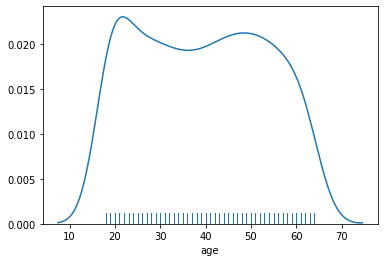

In [8]:
#Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
sns.distplot(df_master["age"], hist=False, rug=True)
plt.show()

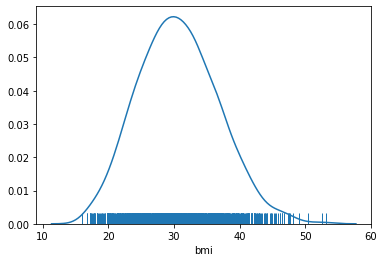

In [9]:
sns.distplot(df_master["bmi"], hist=False, rug=True)
plt.show()

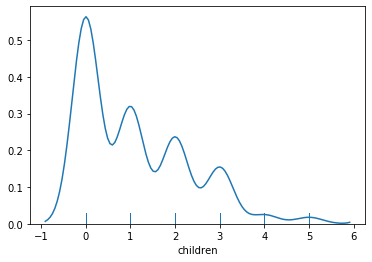

In [10]:
sns.distplot(df_master["children"], hist=False, rug=True)
plt.show()

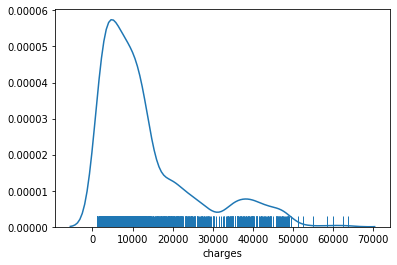

In [11]:
sns.distplot(df_master["charges"], hist=False, rug=True)
plt.show()

### Observations

- Age feature is normally distributed with majority of beneficiary falling between 25 years and 40 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median.
- BMI feature is normally distributed with majority of beneficiary falling between 30 years and 40 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median.
- Childeren is positively skewed. Majority of the beneficiary have childeren between 0 and 1. We can confirm this by saying the mean is greater than the median.
- Charges is also a positively skewed variable and average charges is between 10K to 20K and majority charges less than 10K.

#### Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

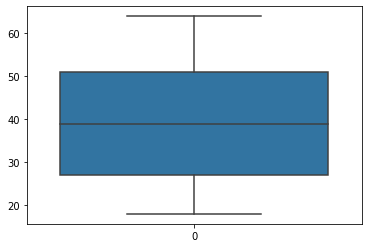

In [12]:
sns.boxplot(data=df_master["age"])

No Outliers in Age Feature

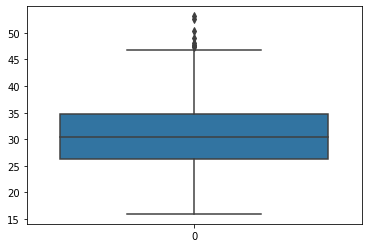

In [13]:
sns.boxplot(data=df_master["bmi"])

There are outliers in BMI

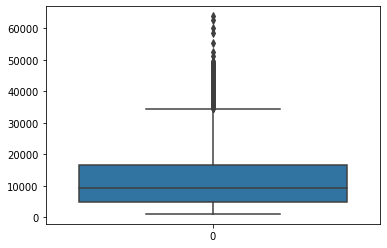

In [14]:
sns.boxplot(data=df_master["charges"])

There are ouliers in Charges

#### Distribution of categorical columns (include children)

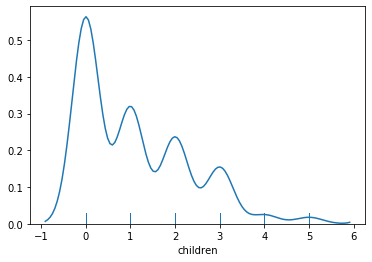

In [15]:
sns.distplot(df_master["children"], hist=False, rug=True)
plt.show()

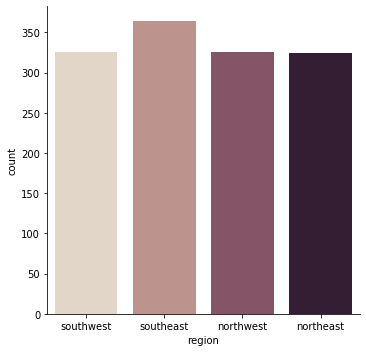

In [16]:
sns.catplot(x="region", kind="count", palette="ch:.25", data=df_master);

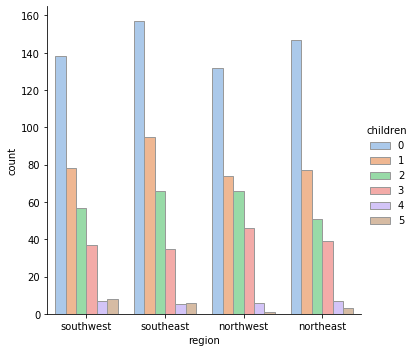

In [17]:
sns.catplot(x="region", hue="children", kind="count", palette="pastel", edgecolor=".6", data=df_master);

#### Pair plot that includes all the columns of the data frame

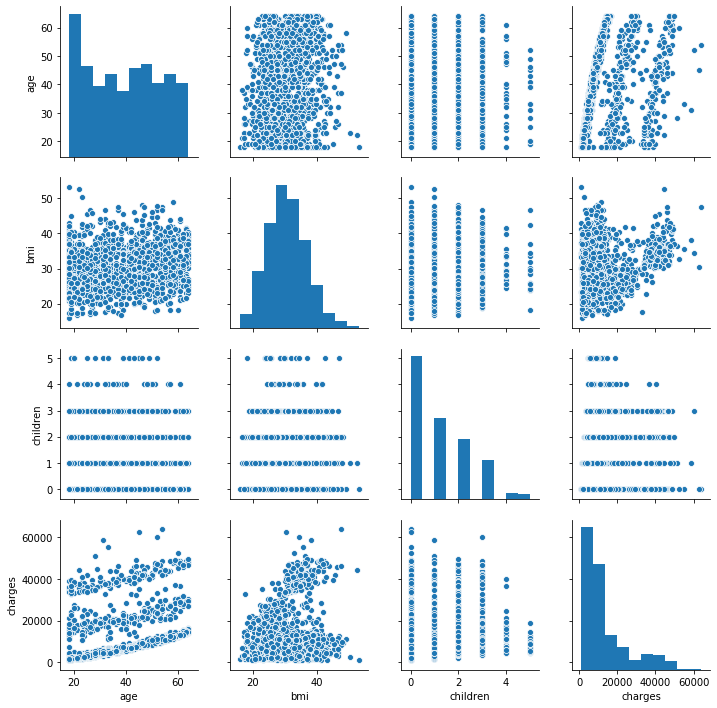

In [18]:
sns.pairplot(df_master)

## Step4 - Question & Answer

### Question a. Do charges of people who smoke differ significantly from the people who don't?

In [19]:
print("Avg. Charges for Non-Smokers: ", df_master[df_master['smoker'] == 'no']['charges'].mean())
print("Avg. Charges for Smokers: ", df_master[df_master['smoker'] == 'yes']['charges'].mean())

Avg. Charges for Non-Smokers:  8434.268297856199
Avg. Charges for Smokers:  32050.23183153285


Answer: Yes, charges for smokers are significantly higher than non smokers.

### Question b. Does bmi of males differ significantly from that of females?

In [20]:
print("Avg. BMI for males: ", df_master[df_master['sex'] == 'male']['bmi'].mean())
print("Avg. BMI for females: ", df_master[df_master['sex'] == 'female']['bmi'].mean())

Avg. BMI for males:  30.943128698224832
Avg. BMI for females:  30.377749244713023


In [21]:
df_master[df_master['sex'] == 'male'].describe()['bmi']

count    676.000000
mean      30.943129
std        6.140435
min       15.960000
25%       26.410000
50%       30.687500
75%       34.992500
max       53.130000
Name: bmi, dtype: float64

In [22]:
df_master[df_master['sex'] == 'female'].describe()['bmi']

count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64

Answer: No, BMI for males and females are almost equivalent.

### Question c. Is the proportion of smokers significantly different in different genders?

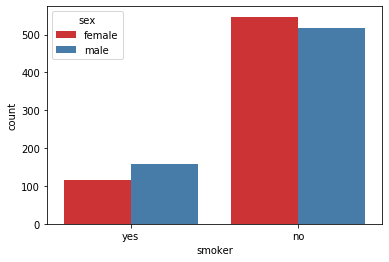

In [23]:
sns.countplot(x='smoker', hue='sex', data=df_master, palette='Set1')

Answer: No, proportion of male and female smoker are almost equivalent.

### Question d. Is the distribution of bmi across women with no children, one child and two children, the same ?

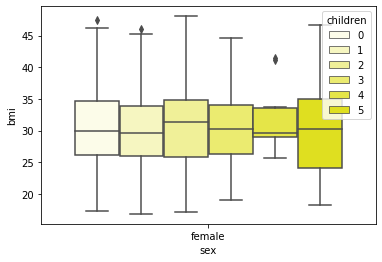

In [24]:
sns.boxplot(x='sex', y='bmi', hue='children', data=df_master[(df_master['sex'] == 'female')], color='yellow')

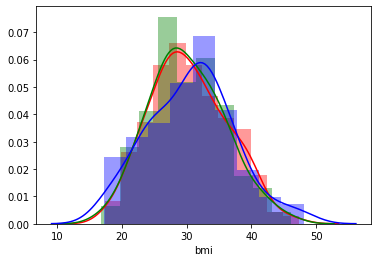

In [25]:
sns.distplot(df_master[(df_master['sex'] == 'female') & (df_master['children'] == 0)]['bmi'], color = 'r')
sns.distplot(df_master[(df_master['sex'] == 'female') & (df_master['children'] == 1)]['bmi'], color = 'g')
sns.distplot(df_master[(df_master['sex'] == 'female') & (df_master['children'] == 2)]['bmi'], color = 'b')

Answer: Yes, distribution of bmi across women with no children, one child and two children is same.